In [48]:
#load Libraries
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
#load data (contains feature engineered attributes)
X,y=mglearn.datasets.load_extended_boston()

In [3]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [4]:
#instantiate and fit model
lr=LinearRegression().fit(X_train,y_train)

In [6]:
print("Training R^2 Score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test R^2 Score: {:.2f}".format(lr.score(X_test,y_test)))

Training R^2 Score: 0.95
Test R^2 Score: 0.61


<p style="font-family:Geneva; font-size:16px"> Such a large discrepancy between training and test score indicates overfitting

In [16]:
#Ridge Regression
ridge=Ridge().fit(X_train,y_train)

In [17]:
print("Training R^2 Score: {:.2f}".format(ridge.score(X_train,y_train)))
print("Test R^2 Score: {:.2f}".format(ridge.score(X_test,y_test)))

Training R^2 Score: 0.89
Test R^2 Score: 0.75


In [18]:
#Ridge Regression with custom alpha value
ridge10=Ridge(alpha=10).fit(X_train,y_train)
print("Training R^2 Score: {:.2f}".format(ridge10.score(X_train,y_train)))
print("Test R^2 Score: {:.2f}".format(ridge10.score(X_test,y_test)))

Training R^2 Score: 0.79
Test R^2 Score: 0.64


In [19]:
#Ridge Regression with custom alpha value
ridge1=Ridge(alpha=1).fit(X_train,y_train)
print("Training R^2 Score: {:.2f}".format(ridge1.score(X_train,y_train)))
print("Test R^2 Score: {:.2f}".format(ridge1.score(X_test,y_test)))

Training R^2 Score: 0.89
Test R^2 Score: 0.75


In [20]:
#Ridge Regression with custom alpha value
ridgePt1=Ridge(alpha=.1).fit(X_train,y_train)
print("Training R^2 Score: {:.2f}".format(ridgePt1.score(X_train,y_train)))
print("Test R^2 Score: {:.2f}".format(ridgePt1.score(X_test,y_test)))

Training R^2 Score: 0.93
Test R^2 Score: 0.77


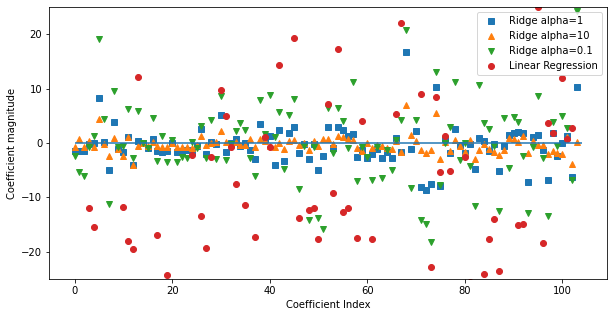

In [45]:
#comparing coefficients for different alpha values
plt.figure(figsize=(10,5))

plt.plot(ridge1.coef_,'s',label="Ridge alpha=1")
plt.plot(ridge10.coef_,'^',label="Ridge alpha=10")
plt.plot(ridgePt1.coef_,'v',label="Ridge alpha=0.1")

plt.plot(lr.coef_,'o',label="Linear Regression")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()


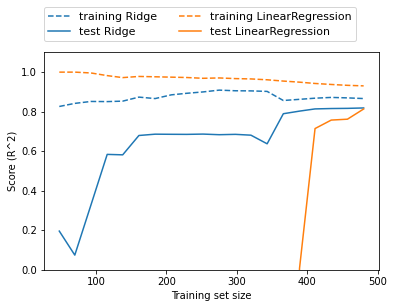

In [46]:
# effect of training data size
mglearn.plots.plot_ridge_n_samples()

In [50]:
# Lasso Regression: alpha default =1
lasso=Lasso().fit(X_train,y_train)
print("Training R^2 Score: {:.2f}".format(lasso.score(X_train,y_train)))
print("Test R^2 Score: {:.2f}".format(lasso.score(X_test,y_test)))
print("Number of features used: ",np.sum(lasso.coef_!=0))

Training R^2 Score: 0.29
Test R^2 Score: 0.21
Number of features used:  4


In [51]:
# Lasso Regression: custom alpha
lasso001=Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)

print("Training R^2 Score: {:.2f}".format(lasso001.score(X_train,y_train)))
print("Test R^2 Score: {:.2f}".format(lasso001.score(X_test,y_test)))
print("Number of features used: ",np.sum(lasso001.coef_!=0))

Training R^2 Score: 0.90
Test R^2 Score: 0.77
Number of features used:  33


In [52]:
# Lasso Regression: custom alpha
lasso00001=Lasso(alpha=0.001,max_iter=100000).fit(X_train,y_train)

print("Training R^2 Score: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("Test R^2 Score: {:.2f}".format(lasso00001.score(X_test,y_test)))
print("Number of features used: ",np.sum(lasso00001.coef_!=0))

Training R^2 Score: 0.94
Test R^2 Score: 0.74
Number of features used:  67


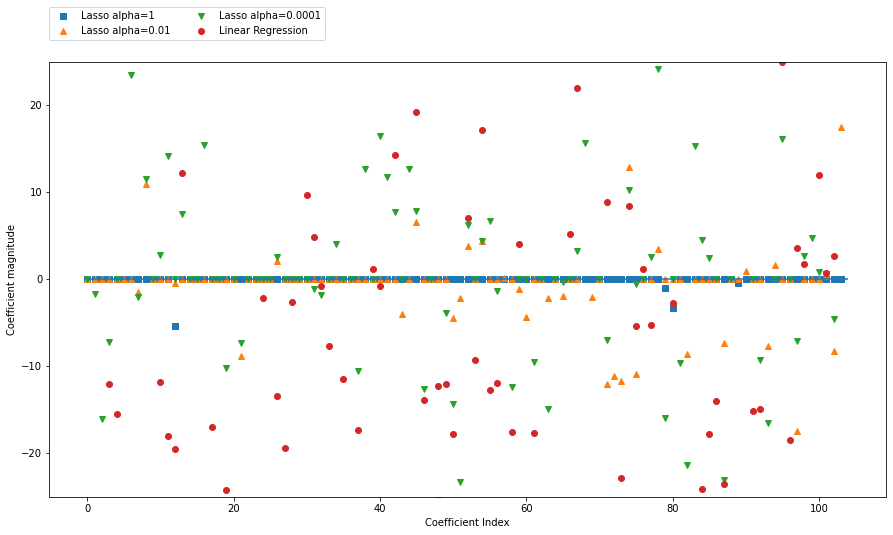

In [55]:
#comparing coefficients for different alpha values
plt.figure(figsize=(15,8))

plt.plot(lasso.coef_,'s',label="Lasso alpha=1")
plt.plot(lasso001.coef_,'^',label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v',label="Lasso alpha=0.0001")

plt.plot(lr.coef_,'o',label="Linear Regression")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend(ncol=2,loc=(0,1.05))
